/Users/Chiara/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:54: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Chiara/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:55: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Chiara/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:81: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


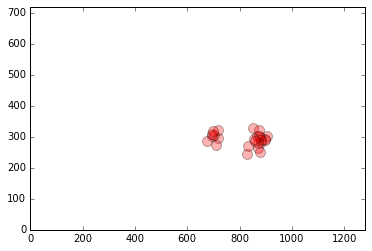

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import cv2
import numpy as np

#Taratura parametri:
sc_fct = 1.1              #parametro che specifica di che fattore viene ridotta l'immagine ad ogni ridimensionamento.
min_neigh = 5             #parametro che indica il minimo numero di oggetti che devono essere riconosciuti vicino ad un candidato oggetto per identificarlo come tale.
min_size_f = (30,30)      #parametro che indica le minime dimensioni che il rettangolo deve avere per essere identificato come volto.
min_size_e = (10,10)      #parametro che indica le dimensioni minime che deve avere un rettangolo per essere identificato come occhio.
#max_size' è il parametro che indica la massime dimensioni che può avere un rettangolo per essere identificato come volto.
#Abbiamo deciso di non utilizzarlo perchè non sappiamo quanto l'utente possa essere distante dalla telecamera.
dp_c=1                   #parametro che indica la risoluzione dell'accumulatore. Se 1, l'accumulatore ha la stessa risoluzione 
#dell'immagine in input
mindist_c=40             #parametro che indica la minima distanza tra centri dei cerchi riconosciuti.
param1_c=50              #primo parametro specifico per il metodo di riconoscimento utilizzato.
param2_c=30              #secondo parametro specifico per il metodo di riconoscimento utilizzato.
minr_c=15                 #parametro che indica il minimo raggio del cerchio.
maxr_c=0                 #parametro che indica il massimo raggio del cerchio.



#importiamo file cascades
faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
eyeCascade=cv2.CascadeClassifier("haarcascade_eye.xml")

#acquisiamo il video dalla webcam e rinominiamo la finestra video
video_capture = cv2.VideoCapture(0)
cv2.namedWindow("Face and eyes")
x_dim=video_capture.get(3)
y_dim=video_capture.get(4)

while True:
    #catturiamo frame da video
    ret, frame = video_capture.read()
    #convertiamo i frame in scale di grigio
    if frame.shape:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    #applichiamo la cascade per il riconoscimento del volto
        faces = faceCascade.detectMultiScale(       
        gray,
        scaleFactor=sc_fct,
        minNeighbors=min_neigh,
        minSize=min_size_f
        )
    #La funzione 'detectMultiScale' ritorna una lista di rettangoli identificati da coordinate del vertice superiore sinistro e dimensioni di base e altezza.
    
    # Disegnamo nella finestra video rettangoli attorno ai volti riconosciuti dalla funzione 'detectMultiscale'.
        for (x, y, w, h) in faces:
            cv2.rectangle(frame,(x, y), (x+w, y+h), (0, 255, 0), 2)
        #Definiamo nuove regioni di interesse, limitate alla metà superiore dei volti.
            roi_gray=gray[y:y+h/2,x:x+w]
            roi_color=frame[y:y+h/2,x:x+w]
        
        #Applichiamo la cascade per il riconoscimento degli occhi soltanto alla regione di interesse sopra definita.
            eyes= eyeCascade.detectMultiScale(         
        roi_gray,
        scaleFactor=sc_fct,
        minNeighbors=min_neigh,
        minSize=min_size_e
    )


        # Disegnamo rettangoli attorno agli occhi.
            for (ex, ey, ew, eh) in eyes:
                cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 191, 0), 2)
            
            #Definiamo nuove regioni di interesse, limitate all'area degli occhi.
                roi_gray2=roi_gray[ey:ey+eh,ex:ex+ew]
                roi_color2=roi_color[ey:ey+eh,ex:ex+ew]
                
            #Applichiamo la funzione 'HoughCircles' per il riconoscimento di cerchi all'interno dell'area sopra definita.
                circles = cv2.HoughCircles(roi_gray2,cv2.HOUGH_GRADIENT,dp=dp_c,minDist=mindist_c,
                            param1=param1_c,param2=param2_c,minRadius=minr_c,maxRadius=maxr_c)
                #La funzione 'HoughCircles' ha il compito di cercare cerchi nelle immagini in scala di grigi.
                #Il primo parametro è l'immagine input in scala di grigi. Nel nostro caso ricerchiamo i cerchi solo nella zone degli occhi.
                #Il secondo parametro indica il metodo di riconoscimento utilizzato.
                
                if(circles==None):
                    continue
                else:
            #Convertiamo i valori (float) restituiti dalla funzione 'HoughCircles' in interi dopo averli arrotondati, permettendoci di diegnare i cerchi sull'immagine.
                  circles = np.uint16(np.around(circles))
            
            #Disegnamo i cerchi idetificati e il loro centro sull'immagine output.
                  for i in circles[0,:]:
                    cv2.circle(roi_color2,(i[0],i[1]),i[2],(0,255,0),2)
                    cv2.circle(roi_color2,(i[0],i[1]),2,(0,0,255),3)
                    
                    
                    plt.scatter(x+ex+i[0],y+ey+i[1], s=100, c='r',alpha=0.3)
                    plt.axis([0,x_dim,0,y_dim])
                    plt.draw()
            

    # Mostriamo il video opportunamente modificato finchè l'utente non preme 'esc'.
    cv2.imshow('Face and eyes', frame)
    if cv2.waitKey(1)==27:
        break
    
#Al termine dell'esecuzione del programma interrompiamo l'acquisizione video e chiudiamo le finestre grafiche.
video_capture.release()
cv2.destroyAllWindows()


# eyedetection